In [1]:
from call_for_data import make_master_dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gps = "(39.29088, -76.61076)"
listgps = list(gps.replace("(", "").replace(")", "").split(","))
listgps[0] = float(listgps[0])
listgps[1] = float(listgps[1])
tuplegps = tuple(listgps)
df1 = make_master_dataframe(tuplegps, 6, 23)


In [3]:
test_frame = df1
test_frame

,date,temperature_2m,precipitation,cloud_cover,wind_speed_100m
0,2025-06-16 05:00:00,62.869999,0.4,100.0,22.285860
1,2025-06-16 06:00:00,62.330002,0.1,100.0,19.376562
2,2025-06-16 07:00:00,61.880001,0.1,100.0,18.900000
3,2025-06-16 08:00:00,61.790001,0.2,100.0,17.823637
4,2025-06-16 09:00:00,61.430000,0.5,100.0,19.765606
...,...,...,...,...,...
355,1981-07-01 00:00:00,74.721199,0.0,13.0,26.220753
356,1981-07-01 01:00:00,72.921196,0.0,14.0,25.842384
357,1981-07-01 02:00:00,71.841202,0.0,18.0,27.055143
358,1981-07-01 03:00:00,71.121201,0.0,23.0,28.220417


In [4]:
# step 1 should be to convert UTC to local time
# step 2 should be to split the day from the hour
# step 3 should be groupby hour - should result in 24 groups
# step 4 should be analysis of the group data
#we should probably use boolean to evaluate the chance of rain or clouds

In [5]:
# step 1 - converting to local time
test_frame['local'] = test_frame['date'].dt.tz_localize('utc').dt.tz_convert('America/Chicago')
test_frame = test_frame.drop('date', axis=1)

In [6]:
test_frame

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,local
0,62.869999,0.4,100.0,22.285860,2025-06-16 00:00:00-05:00
1,62.330002,0.1,100.0,19.376562,2025-06-16 01:00:00-05:00
2,61.880001,0.1,100.0,18.900000,2025-06-16 02:00:00-05:00
3,61.790001,0.2,100.0,17.823637,2025-06-16 03:00:00-05:00
4,61.430000,0.5,100.0,19.765606,2025-06-16 04:00:00-05:00
...,...,...,...,...,...
355,74.721199,0.0,13.0,26.220753,1981-06-30 19:00:00-05:00
356,72.921196,0.0,14.0,25.842384,1981-06-30 20:00:00-05:00
357,71.841202,0.0,18.0,27.055143,1981-06-30 21:00:00-05:00
358,71.121201,0.0,23.0,28.220417,1981-06-30 22:00:00-05:00


In [7]:
#create a checkpoint to avoid having to restart kernel
test_frame2 = test_frame

In [8]:
#step 2 - splitting day from hour
test_frame2['Dates'] = pd.to_datetime(test_frame2['local']).dt.date
test_frame2['Time'] = pd.to_datetime(test_frame2['local']).dt.time
test_frame2 = test_frame.drop('local', axis=1)
test_frame2

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,Dates,Time
0,62.869999,0.4,100.0,22.285860,2025-06-16,00:00:00
1,62.330002,0.1,100.0,19.376562,2025-06-16,01:00:00
2,61.880001,0.1,100.0,18.900000,2025-06-16,02:00:00
3,61.790001,0.2,100.0,17.823637,2025-06-16,03:00:00
4,61.430000,0.5,100.0,19.765606,2025-06-16,04:00:00
...,...,...,...,...,...,...
355,74.721199,0.0,13.0,26.220753,1981-06-30,19:00:00
356,72.921196,0.0,14.0,25.842384,1981-06-30,20:00:00
357,71.841202,0.0,18.0,27.055143,1981-06-30,21:00:00
358,71.121201,0.0,23.0,28.220417,1981-06-30,22:00:00


In [9]:
type(test_frame2['Time'])

pandas.core.series.Series

<Axes: xlabel='Time', ylabel='temperature_2m'>

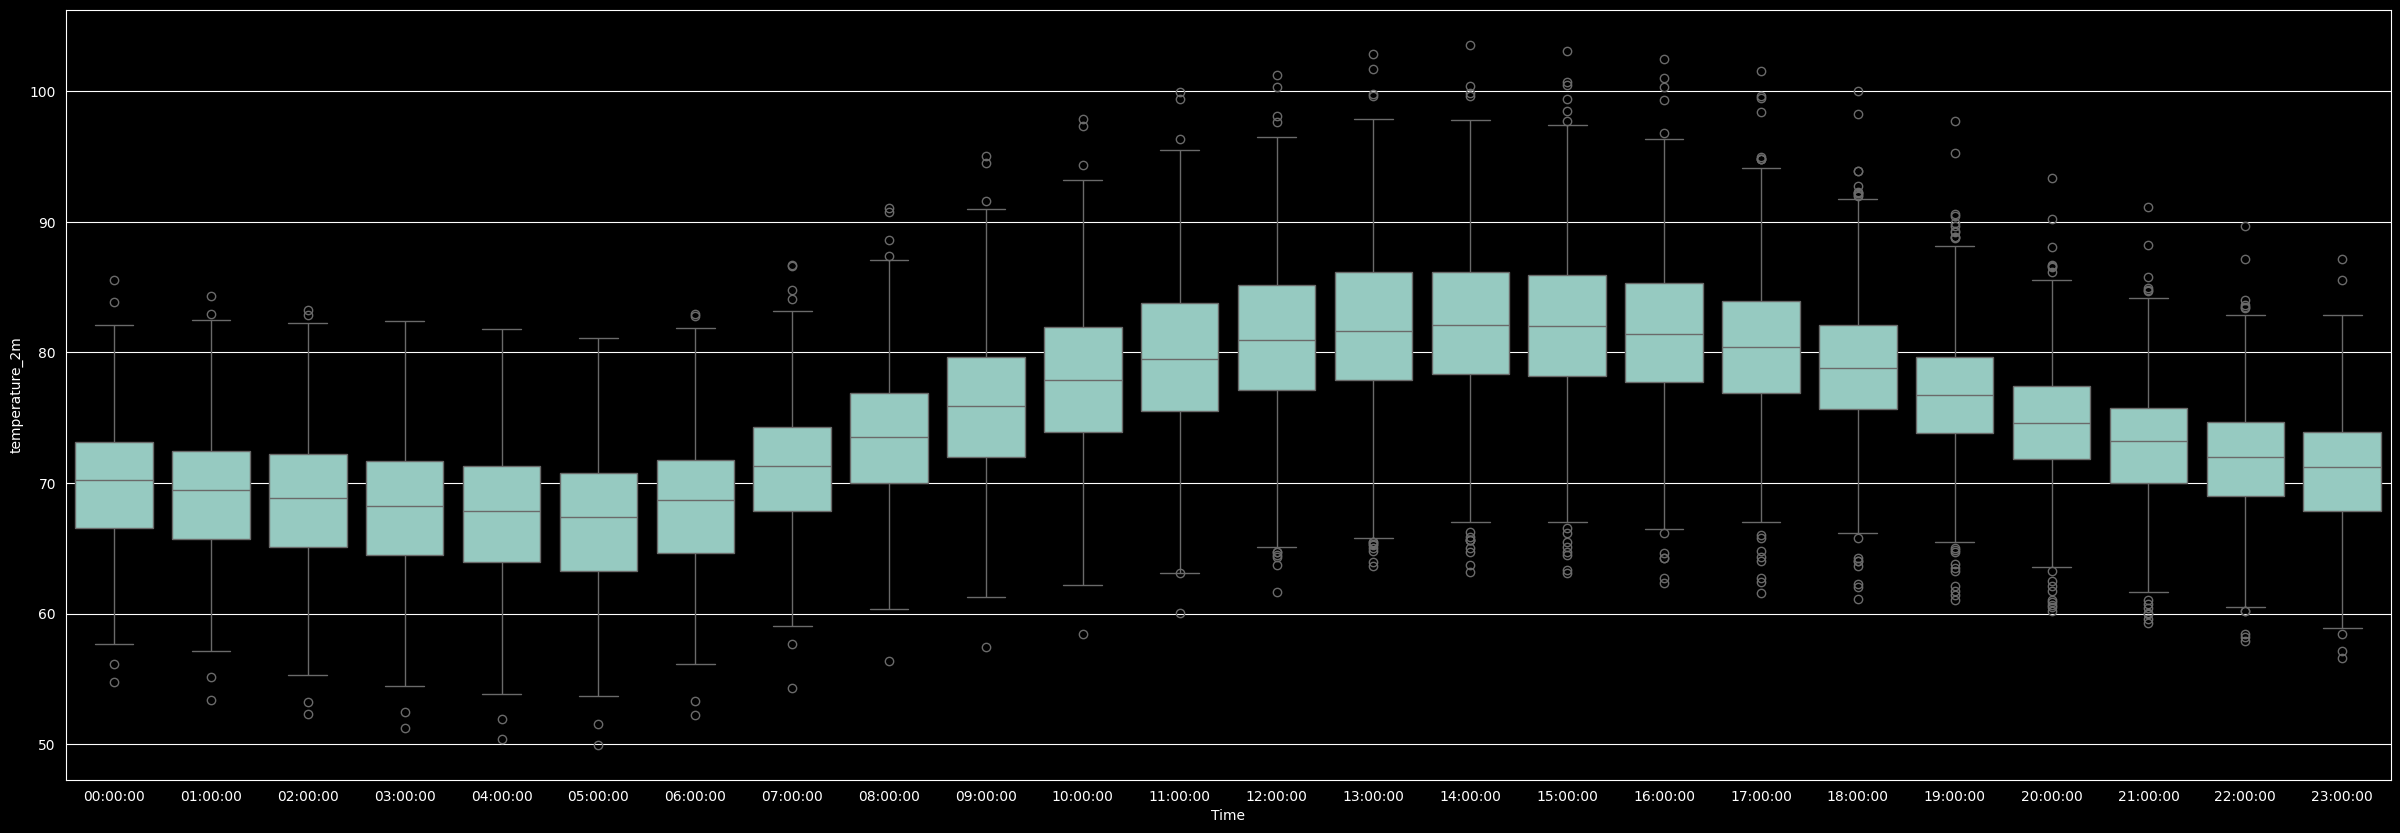

In [10]:
plt.figure(figsize=(30,10))
sns.boxplot(test_frame2, x=test_frame2['Time'], y=test_frame2['temperature_2m'])


In [11]:
#step 3, group by hour
time_groups = test_frame.groupby('Time')

In [12]:
#step 4 analysis of data by hour
summary = time_groups.describe()

In [13]:
summary_plottable = summary['temperature_2m'].drop('count', axis=1)

In [14]:
summary_plottable

,mean,std,min,25%,50%,75%,max
Time,,,,,,,
00:00:00,69.927757,4.855561,54.741199,66.531204,70.250000,73.160603,85.550003
01:00:00,69.166420,4.941214,53.391201,65.721199,69.501198,72.485600,84.289993
02:00:00,68.555626,5.019256,52.311199,65.136200,68.871201,72.201202,83.210007
03:00:00,67.934296,5.099613,51.231201,64.461197,68.269997,71.720600,82.400002
04:00:00,67.392822,5.163085,50.421200,63.921196,67.881203,71.301201,81.769997
05:00:00,66.947098,5.205715,49.971199,63.291199,67.431198,70.761200,81.139999
06:00:00,68.143227,4.955863,52.221199,64.641197,68.691200,71.751198,82.940002
07:00:00,71.131493,4.780017,54.291199,67.881203,71.301201,74.285599,86.720001
08:00:00,73.606293,5.164458,56.361198,70.041199,73.551201,76.881203,91.039993


<Axes: xlabel='Time'>

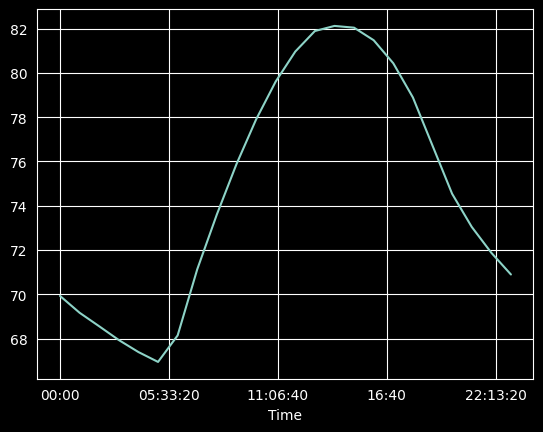

In [15]:
summary_plottable['mean'].plot()

In [16]:

#the first thing we should do is group the data by period of day
#currently there is an hourly breakdown - lets take each hour and assign to a group:
# wee hours 00:00-5:00
# morning: 5:00 - 12:00
# afternoon: 12:00-17:00
# evening: 17:00-20:00
# night: 20:00-24:00

In [17]:
hour_to_filter = 12
filtered_rows = df1[df1['date'].dt.hour == hour_to_filter]

In [18]:
filtered_rows["temperature_2m"].mean()

np.float32(71.13149)

In [19]:
filtered_rows["temperature_2m"].median()

np.float32(71.3012)

In [20]:
filtered_rows["temperature_2m"].min()

np.float32(54.2912)

In [21]:
filtered_rows["temperature_2m"].max()

np.float32(86.72)

In [22]:
#can we generate a bell curve?

In [23]:
hours = range(0, 24)
output_dict = {}
for hour in hours:
    hour_to_eval = hour
    filtered_rows = df1[df1['date'].dt.hour == hour_to_eval]
    hour_min = filtered_rows["temperature_2m"].min()
    hour_mean = filtered_rows["temperature_2m"].mean()
    hour_median = filtered_rows["temperature_2m"].median()
    hour_max = filtered_rows["temperature_2m"].max()
    output_dict[hour_to_eval] = (hour_min, hour_mean, hour_median, hour_max)

In [24]:
output_dict

{0: (np.float32(61.07),
  np.float32(76.71496),
  np.float32(76.7012),
  np.float32(97.7)),
 1: (np.float32(60.17),
  np.float32(74.54056),
  np.float32(74.57),
  np.float32(93.38)),
 2: (np.float32(59.269997),
  np.float32(73.04562),
  np.float32(73.1912),
  np.float32(91.13)),
 3: (np.float32(57.92),
  np.float32(71.87643),
  np.float32(72.021194),
  np.float32(89.689995)),
 4: (np.float32(56.6312),
  np.float32(70.895226),
  np.float32(71.2112),
  np.float32(87.17)),
 5: (np.float32(54.7412),
  np.float32(69.92776),
  np.float32(70.25),
  np.float32(85.55)),
 6: (np.float32(53.3912),
  np.float32(69.16642),
  np.float32(69.5012),
  np.float32(84.28999)),
 7: (np.float32(52.3112),
  np.float32(68.555626),
  np.float32(68.8712),
  np.float32(83.21001)),
 8: (np.float32(51.2312),
  np.float32(67.934296),
  np.float32(68.27),
  np.float32(82.4)),
 9: (np.float32(50.4212),
  np.float32(67.39282),
  np.float32(67.8812),
  np.float32(81.77)),
 10: (np.float32(49.9712),
  np.float32(66.9471